In [53]:
## Major Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy 
import missingno
## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn_features.transformers import DataFrameSelector
## sklearn -- metrics
from sklearn.metrics import mean_squared_error,r2_score
## sklearn -- Models
from sklearn.linear_model import LinearRegression

In [2]:
#read data 
df=pd.read_csv("M:\\Courses\\ML full project\\Regression_Project_Course-main\\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#ocean oproximity as a string data type 
df["ocean_proximity"]=df["ocean_proximity"].astype(str)

<AxesSubplot:>

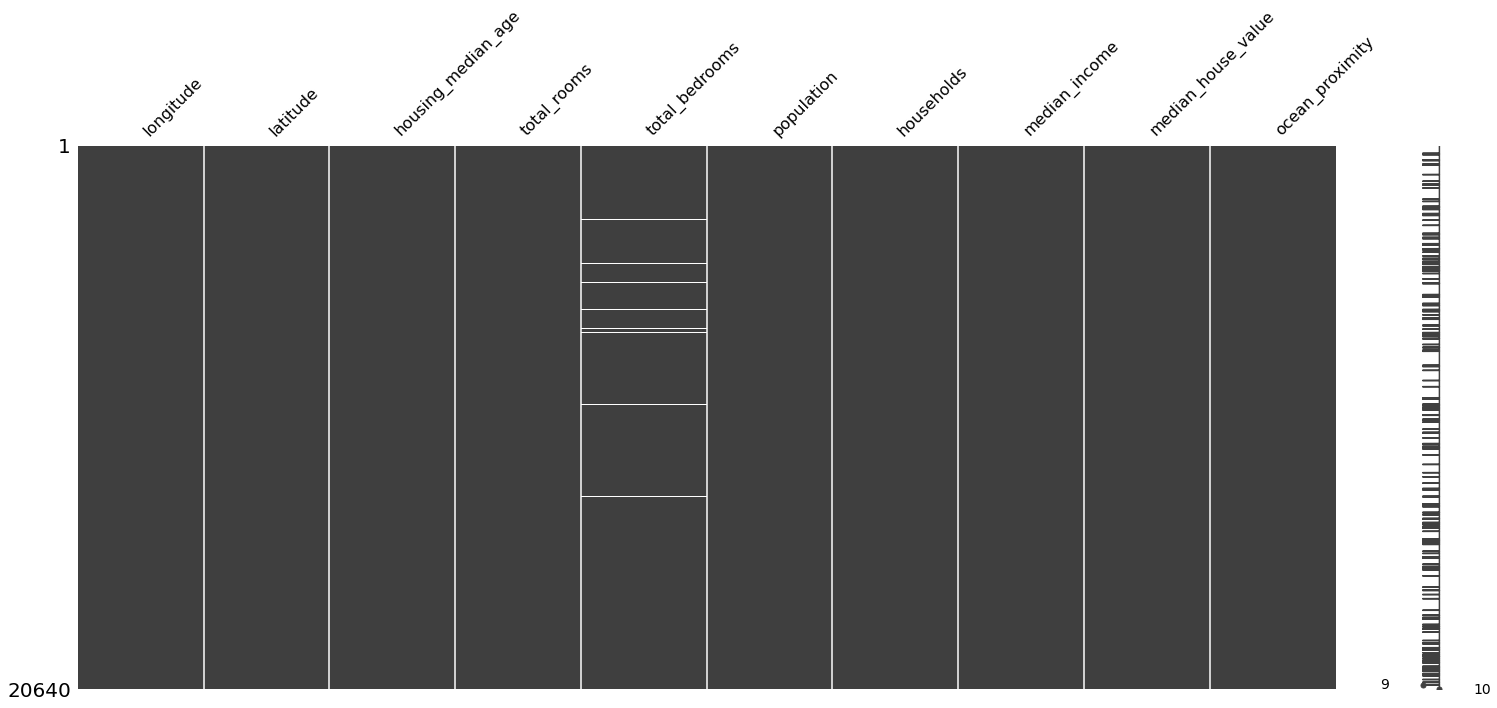

In [9]:
#find null values 
missingno.matrix(df)
#df.isna().sum()

In [5]:
#exploration the data 
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [22]:
#explore ocean value features 
ocean_values = df['ocean_proximity'].value_counts()
print('categories of (ocean_proximity) --- \n', ocean_values)

categories of (ocean_proximity) --- 
 1H OCEAN      9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [18]:
#remove (<) from  <1H OCEAN from ocean_proximity feature
df['ocean_proximity'] = df['ocean_proximity'].replace('<1H OCEAN', '1H OCEAN')

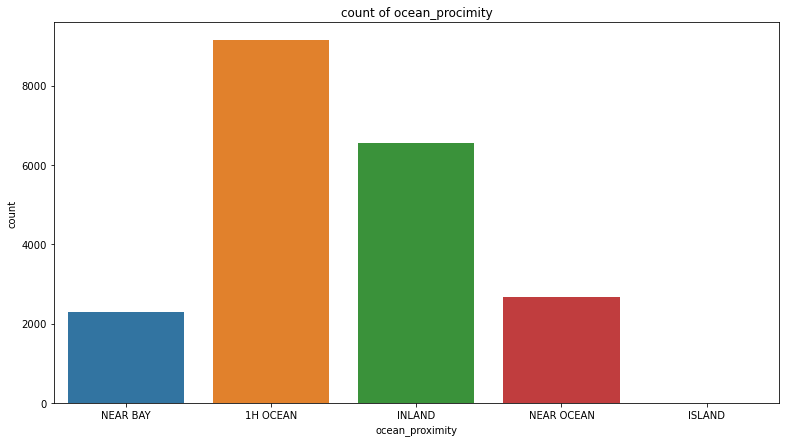

In [20]:
plt.figure(figsize=(13,7))
sns.countplot(x=df["ocean_proximity"])
plt.title("count of ocean_procimity")
plt.show()

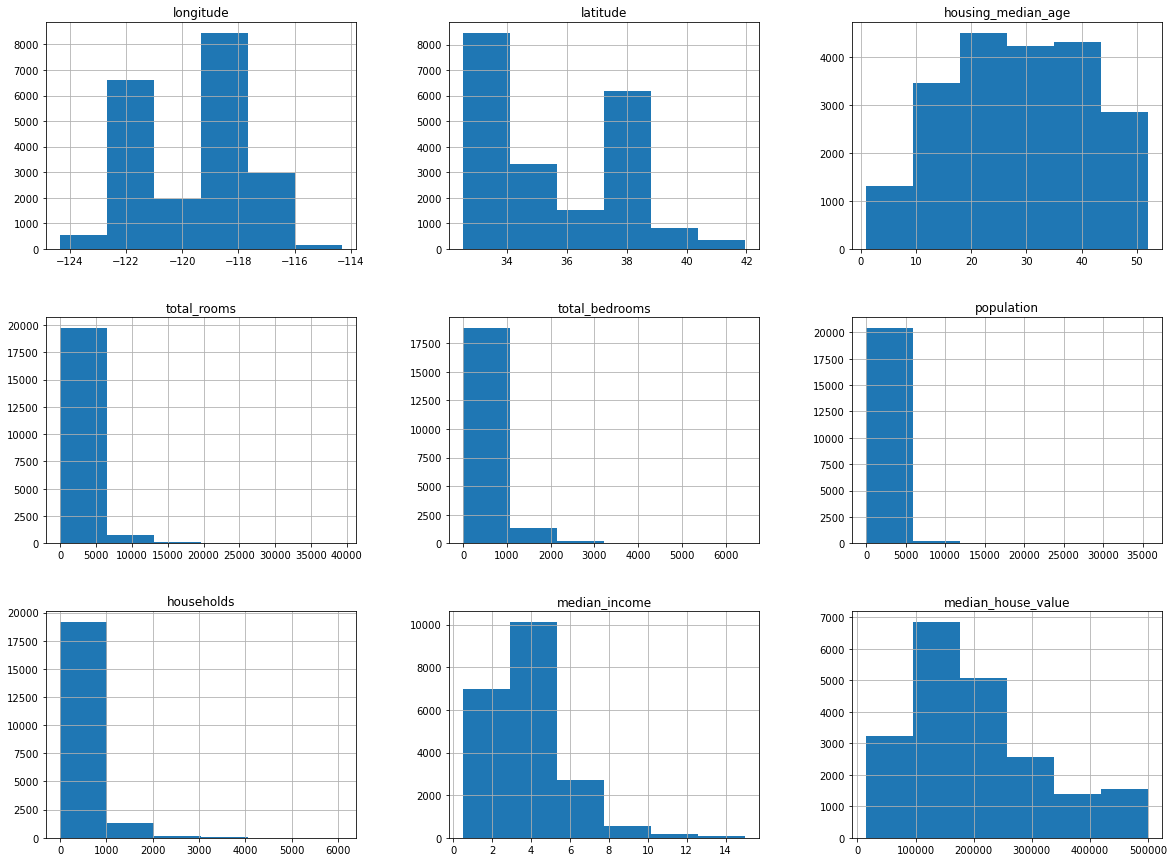

In [26]:
#plot the distribution of the data 
df.hist(bins=6 , figsize=(20,15))
plt.show()

In [27]:
#find the relation  between median_income and median_house_value


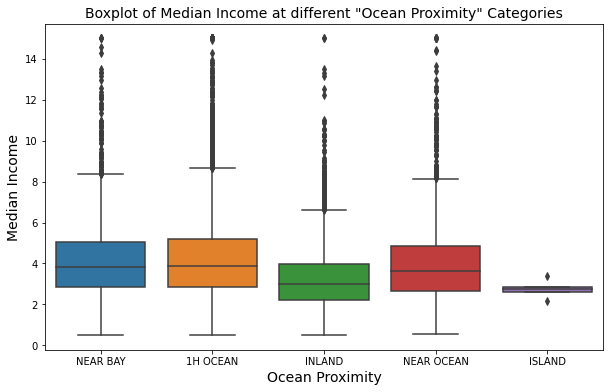

In [28]:
#find outliers in ocean_procimity
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_income', data=df, x='ocean_proximity')
plt.title('Boxplot of Median Income at different "Ocean Proximity" Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median Income', fontsize=14, c='k')
plt.show()

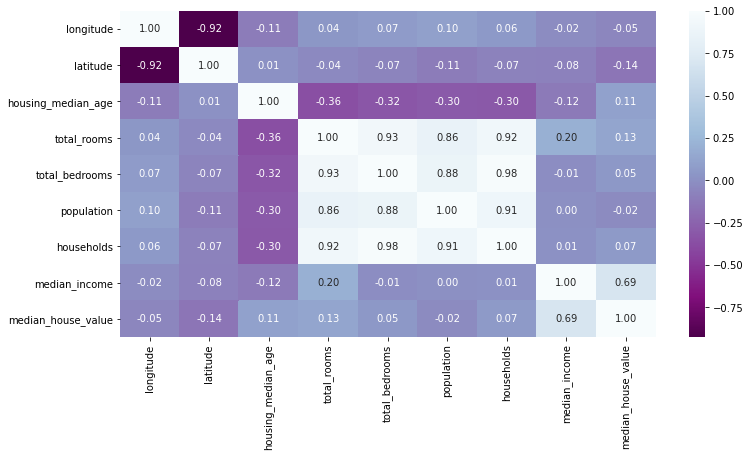

In [36]:
## you can show the reaalation as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='BuPu_r', fmt='.2f')  ## symmetric matrix
plt.show()

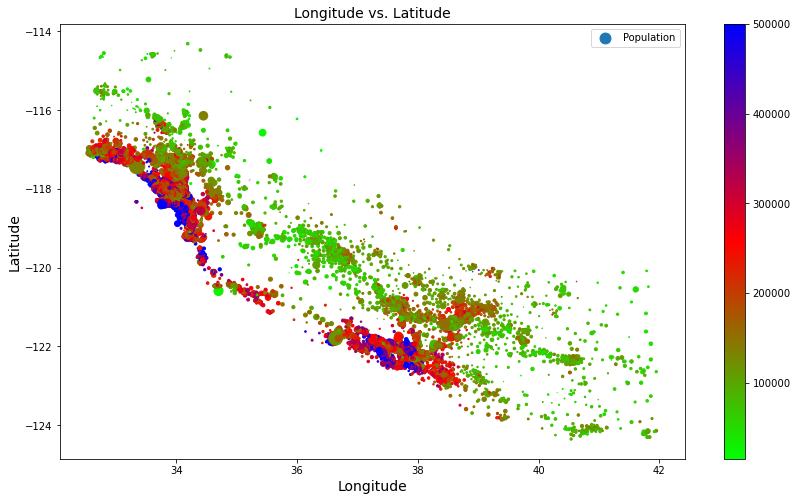

In [34]:
#show the distribution of the population of the data 
plt.figure(figsize=(14,8))
sc=plt.scatter(x=df["latitude"],y=df["longitude"],s=df["population"]/150 , c = df['median_house_value']
           ,cmap="brg_r",label='Population')
plt.colorbar(sc) 
plt.xlabel('Longitude', fontsize=14, c='k')
plt.ylabel('Latitude', fontsize=14, c='k')
plt.title('Longitude vs. Latitude', fontsize=14, c='k')
plt.legend()
plt.show()

In [37]:
## Try to make some Feature Engineering --> F eature Extraction --> Add the new column to the main DF
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedroms_per_rooms'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [38]:
## check the correlation again
df.corr()['median_house_value'].sort_values(ascending=False)  ## some progress for out new features (very good)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

<AxesSubplot:>

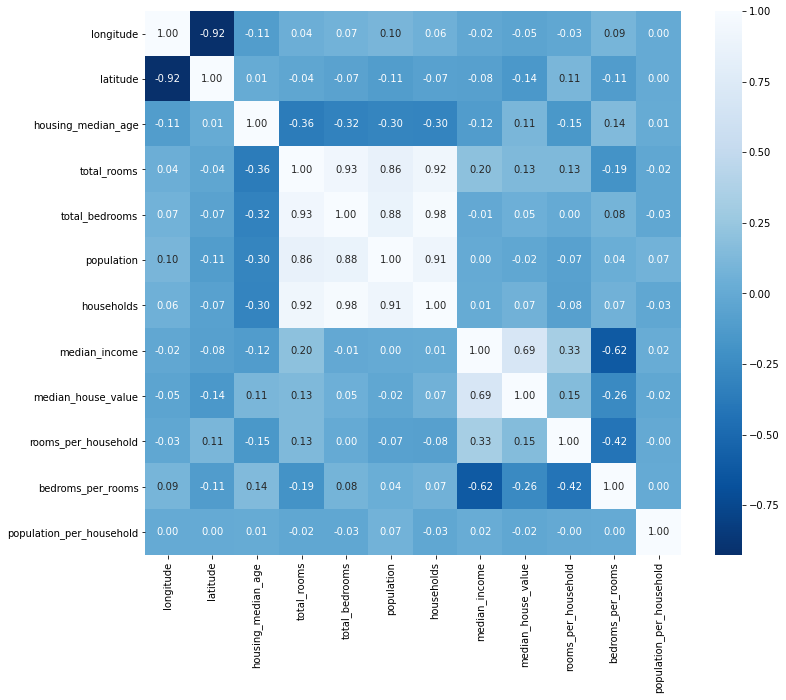

In [39]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues_r",fmt=".2f")

In [40]:
X=df.drop(columns=["median_house_value"],axis=1)
y=df["median_house_value"]

In [41]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,shuffle=True , random_state=42)

In [42]:
#Num_feat=[]
#for col in df.columns :
#    if df[col].dtype in ["int32","int64","float32","float64"]:
 #       Num_feat.append(col)
Num_feat=[col for col in X_train.columns if X_train[col].dtype in ["int64","int32","float32","float64"]]       
Str_feat=[col for col in X_train.columns if X_train[col].dtype not in ["int64","int64","float32","float64"]]    
print("Numercal feature is \n", Num_feat) 
print("String feature is \n", Str_feat)

Numercal feature is 
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedroms_per_rooms', 'population_per_household']
String feature is 
 ['ocean_proximity']


In [45]:
## We can get much much easier like the following
## numerical pipeline
num_pipeline = Pipeline([
                        ('selector', DataFrameSelector(Num_feat)),    ## select only these columns
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                        ])

## categorical pipeline
categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(Str_feat)),    ## select only these columns
            ('imputer', SimpleImputer(strategy='constant', fill_value='1H OCEAN')),
            ('OHE', OneHotEncoder(sparse=False))])

## concatenate both two pipelines
total_pipeline = FeatureUnion(transformer_list=[
                                            ('num_pipe', num_pipeline),
                                            ('categ_pipe', categ_pipeline)
                                               ]
                             )
## deal with (total_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_final = total_pipeline.fit_transform(X_train)
X_test_final = total_pipeline.transform(X_test)                 ### Every thing is processed :D

In [46]:
Lin_Reg=LinearRegression()
train=Lin_Reg.fit(X_train_final,y_train)

In [47]:
pred=Lin_Reg.predict(X_test_final)

In [54]:
acc=r2_score(pred,y_test)
print (acc)

0.47002128481700345
